![](2024-08-14-18-07-11.png)

# IMAGE UPSCALING NOTEBOOK
## Author: Diversa
## Last Update: 22/8/2024
## Proyect: Feminist Urban Sense
## Contact: hello@diversa.studio
---

### 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment.

In [ ]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 759 (delta 0), reused 2 (delta 0), pack-reused 755
Receiving objects: 100% (759/759), 5.39 MiB | 25.54 MiB/s, done.
Resolving deltas: 100% (406/406), done.
/content/Real-ESRGAN/Real-ESRGAN
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:42: EasyInstallDeprecationWarning: ea

In [ ]:
#Main Imports
import os
from google.colab import drive
from PIL import Image
from google.colab import files
import shutil
from torchvision.transforms.functional import rgb_to_grayscale
import cv2
import matplotlib.pyplot as plt

### 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [ ]:
# Define folders
upload_folder = 'upload'
result_folder = 'results'

# Clean up any existing directories
if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the Google Drive folder containing your images
drive_folder = '/content/drive/MyDrive/argentina_crudo'

# Copy images from Google Drive folder to upload folder
for filename in os.listdir(drive_folder):
    src_path = os.path.join(drive_folder, filename)
    dst_path = os.path.join(upload_folder, filename)
    shutil.copy(src_path, dst_path)
    print(f'Copied {filename} to {dst_path}')

Copied streetview_616_0.png to upload/streetview_616_0.png
Copied streetview_616_90.png to upload/streetview_616_90.png
Copied streetview_616_180.png to upload/streetview_616_180.png
Copied streetview_616_270.png to upload/streetview_616_270.png
Copied streetview_617_0.png to upload/streetview_617_0.png
Copied streetview_617_90.png to upload/streetview_617_90.png
Copied streetview_617_180.png to upload/streetview_617_180.png
Copied streetview_617_270.png to upload/streetview_617_270.png
Copied streetview_618_0.png to upload/streetview_618_0.png
Copied streetview_618_90.png to upload/streetview_618_90.png
Copied streetview_618_180.png to upload/streetview_618_180.png
Copied streetview_618_270.png to upload/streetview_618_270.png
Copied streetview_619_0.png to upload/streetview_619_0.png
Copied streetview_619_90.png to upload/streetview_619_90.png
Copied streetview_619_180.png to upload/streetview_619_180.png
Copied streetview_619_270.png to upload/streetview_619_270.png
Copied streetvie

If you want to upload the photos and not get them from Google Drive run this instead: 

In [ ]:
upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

### 3. Inference
Because of deprecated repositories, we make a correction on libraries to correctly run model

In [ ]:
# Upgrade Torchvision
!pip install --upgrade torchvision

# Modify the degradations.py file to fix the import
!sed -i 's/from torchvision.transforms.functional_tensor import rgb_to_grayscale/from torchvision.transforms.functional import rgb_to_grayscale/g' /usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py


In [ ]:
#Re import the updated library to fix the import error
from torchvision.transforms.functional import rgb_to_grayscale
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 -o /content/drive/MyDrive/argentina_sr
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore.

Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/Real-ESRGAN/Real-ESRGAN/weights/RealESRGAN_x4plus.pth

100% 63.9M/63.9M [00:00<00:00, 229MB/s]
/content/Real-ESRGAN/Real-ESRGAN/realesrgan/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case wh

### 4. Visualization
Here we will see a preview for comparison in pair plots for de original and upscaled images

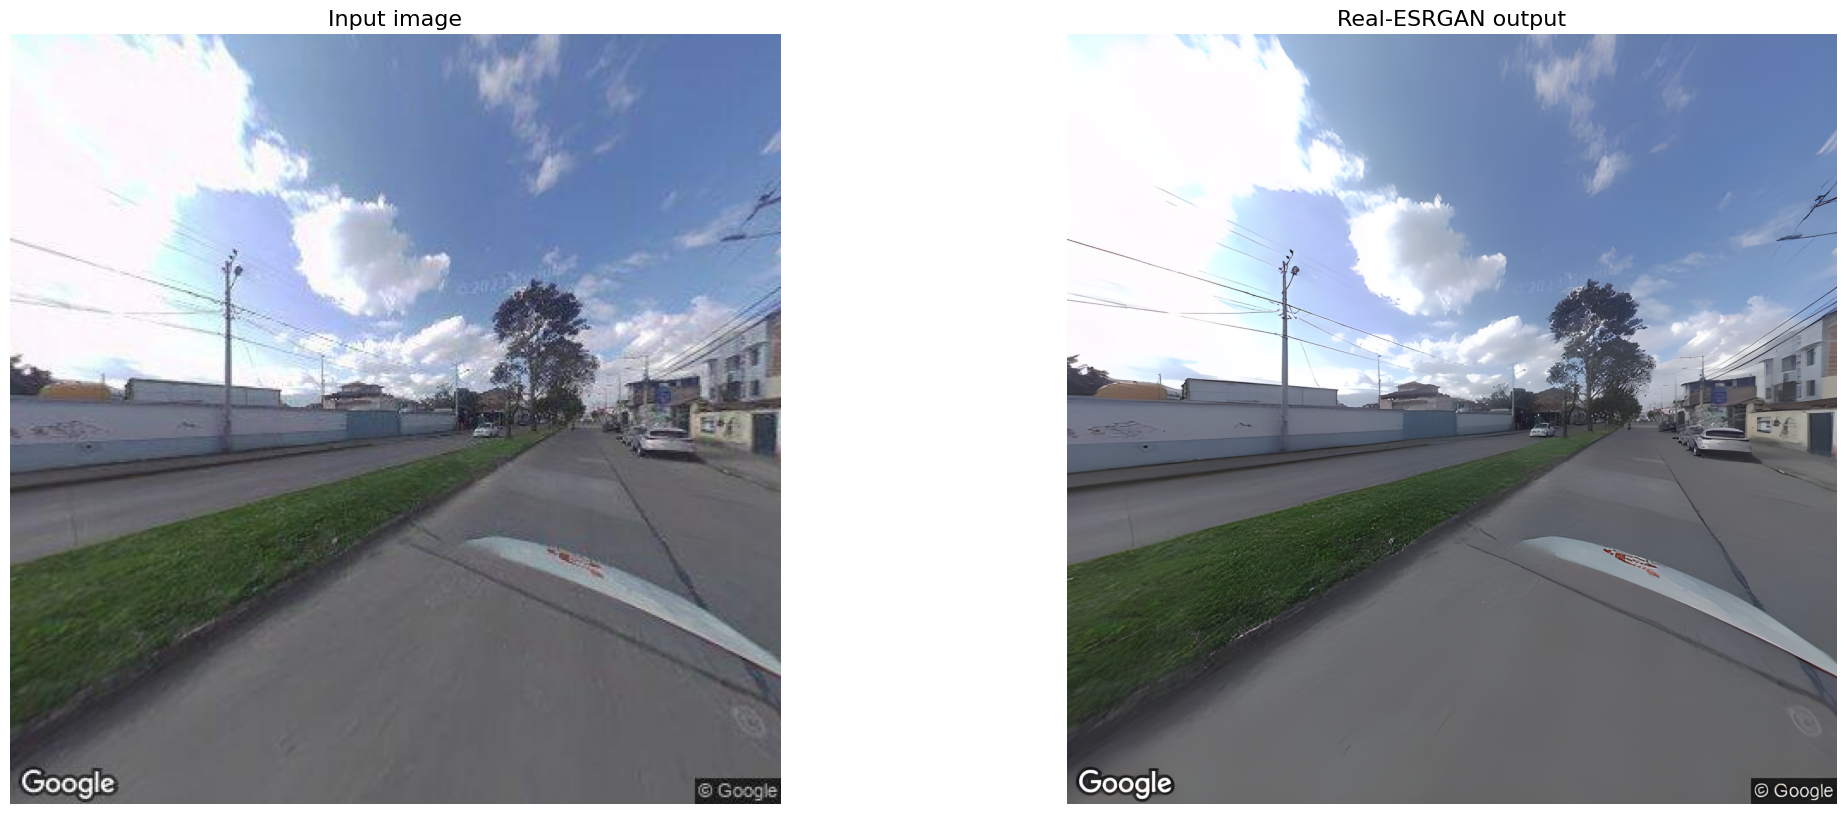

In [ ]:
# Image Plot Function
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

### 5. Download Results
Use this if you uploaded the images, if not skip this step

In [ ]:
# Download the results
from google.colab import files
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")


NameError: name 'files' is not defined

In [ ]:
from google.colab import files
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 6. Metrics Analisis
Metrics analisis and csv download for further analisis of the model's work

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import pandas as pd

# Función para subir múltiples imágenes
def upload_images(label):
    print(f"Sube las imágenes {label}:")
    uploaded = files.upload()
    images = []
    for filename in uploaded.keys():
        img = Image.open(filename).convert('RGB')  # Asegura que las imágenes estén en formato RGB
        images.append((filename, img))
    return images

# Función para calcular métricas comparativas
def calculate_metrics(original_images, enhanced_images):
    metrics = []
    for (filename1, orig_img), (filename2, enh_img) in zip(original_images, enhanced_images):
        orig_img_np = np.array(orig_img)
        enh_img_np = np.array(enh_img)

        # Calcula PSNR y SSIM
        psnr_value = psnr(orig_img_np, enh_img_np, data_range=enh_img_np.max() - enh_img_np.min())
        ssim_value, _ = ssim(orig_img_np, enh_img_np, full=True, multichannel=True)

        metrics.append((filename1, psnr_value, ssim_value))
    return metrics

# Función para guardar métricas en un archivo CSV
def save_metrics_to_csv(metrics, filename):
    df = pd.DataFrame(metrics, columns=["Filename", "PSNR", "SSIM"])
    df.to_csv(filename, index=False)
    print(f"Metrics saved to {filename}")
    return filename

# Función para mostrar imágenes y métricas
def display_results(metrics):
    print("Filename\tPSNR\tSSIM")
    for filename, psnr_value, ssim_value in metrics:
        print(f"{filename}\t{psnr_value:.2f}\t{ssim_value:.4f}")

# Sube las imágenes originales
original_images = upload_images("originales")

# Sube las imágenes mejoradas
enhanced_images = upload_images("mejoradas")

# Calcula las métricas comparativas
metrics = calculate_metrics(original_images, enhanced_images)

# Muestra los resultados
display_results(metrics)

# Guarda las métricas en un archivo CSV
csv_filename = save_metrics_to_csv(metrics, "image_metrics.csv")

# Lee el archivo CSV y muestra el encabezado
df = pd.read_csv(csv_filename)
print(df.head())

# Proporciona un enlace para descargar el archivo CSV
files.download(csv_filename)
